In [1]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# The following line is required to enable IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading)
    print('-' * 50)

In [3]:
# load data
df = pd.read_csv('heart_disease_uci.csv')

# preview the data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info() # exploring the data type of each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# checking the data shape

print(f'The number of rows in our data set is {df.shape[0]} \n The numbers of columns are {df.shape[1]}')

The number of rows in our data set is 920 
 The numbers of columns are 16


In [6]:
# Résumé traduit en français
def afficher_resume():
    print("--------------------------------------------------")
    print("RESUME DES INFORMATIONS DU DATASET")
    print("--------------------------------------------------")
    print("1. Le dataset contient 920 entrées et 16 caractéristiques pertinentes aux études sur les maladies cardiaques.")
    print("2. Des données complètes sont disponibles pour 'id', 'age', 'sex', 'dataset', 'cp', et la variable de résultat 'num'.")
    print("3. Des données manquantes significatives se trouvent dans 'ca' avec 66,41 % de valeurs manquantes.")
    print("4. Des données manquantes significatives se trouvent dans 'thal' avec 52,83 % de valeurs manquantes.")
    print("5. 'Slope' a également une quantité considérable de données manquantes, avec seulement 611 entrées non nulles.")
    print("6. Les variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang' et 'oldpeak' ont quelques valeurs manquantes, mais dans une moindre mesure.")

# Appel de la fonction pour afficher le résumé
afficher_resume()


--------------------------------------------------
RESUME DES INFORMATIONS DU DATASET
--------------------------------------------------
1. Le dataset contient 920 entrées et 16 caractéristiques pertinentes aux études sur les maladies cardiaques.
2. Des données complètes sont disponibles pour 'id', 'age', 'sex', 'dataset', 'cp', et la variable de résultat 'num'.
3. Des données manquantes significatives se trouvent dans 'ca' avec 66,41 % de valeurs manquantes.
4. Des données manquantes significatives se trouvent dans 'thal' avec 52,83 % de valeurs manquantes.
5. 'Slope' a également une quantité considérable de données manquantes, avec seulement 611 entrées non nulles.
6. Les variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang' et 'oldpeak' ont quelques valeurs manquantes, mais dans une moindre mesure.


In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
def afficher_constatations():
    print("Observation :")
    print("Nous avons les données de 920 individus avec 16 colonnes, qui incluent ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'dataset'].")
    print("- 'num' est l'attribut prédit qui indique le niveau de maladie cardiaque.")
    print("- 'dataset' est la source des données.")
    print("- 'age' est l'âge de la personne.")
    print("- 'trestbps' est la pression artérielle au repos.")
    print()
    print("Nos données montrent une moyenne d'âge des individus de 53 ans, avec un âge maximum de 77 ans, tandis que nous avons également un âge minimum de 28 ans pour un patient dans notre dataset, avec une maladie cardiaque suspectée.")
    print("La pression artérielle au repos moyenne est de 132, avec un maximum de 200.")
    print()
    print("--------------------------------------------------")
    print("OBSERVATIONS DES STATISTIQUES SOMMAIRES")
    print("--------------------------------------------------")
    print("1. Il n'y a pas de maladies cardiaques trouvées chez 25 % des patients avec une moyenne d'âge de 47,0 ans.")
    print("2. Une présence légère de maladies cardiaques est trouvée chez 50 % des patients avec une moyenne d'âge de 54,0 ans.")
    print("3. Une présence modérée de maladies cardiaques est trouvée chez 75 % des patients avec une moyenne d'âge de 60,0 ans ou plus.")

# Appel de la fonction pour afficher les constatations
afficher_constatations()


Observation :
Nous avons les données de 920 individus avec 16 colonnes, qui incluent ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'dataset'].
- 'num' est l'attribut prédit qui indique le niveau de maladie cardiaque.
- 'dataset' est la source des données.
- 'age' est l'âge de la personne.
- 'trestbps' est la pression artérielle au repos.

Nos données montrent une moyenne d'âge des individus de 53 ans, avec un âge maximum de 77 ans, tandis que nous avons également un âge minimum de 28 ans pour un patient dans notre dataset, avec une maladie cardiaque suspectée.
La pression artérielle au repos moyenne est de 132, avec un maximum de 200.

--------------------------------------------------
OBSERVATIONS DES STATISTIQUES SOMMAIRES
--------------------------------------------------
1. Il n'y a pas de maladies cardiaques trouvées chez 25 % des patients avec une moyenne d'âge de 47,0 ans.
2. Une présence légère de maladie

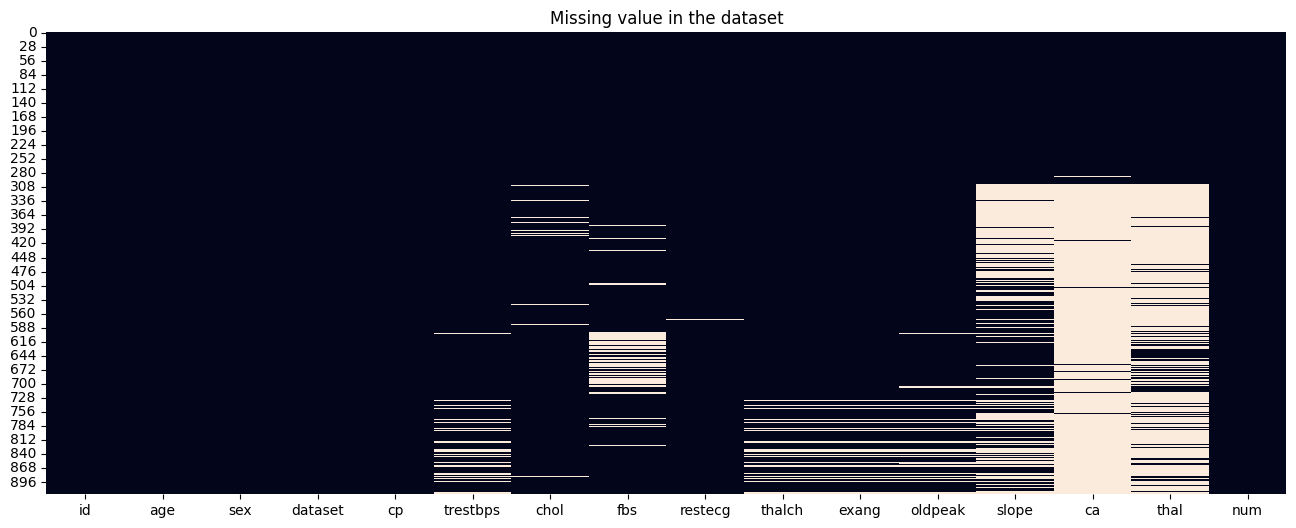

In [9]:
# Plot the heatmap on dataset to check the missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing value in the dataset')
plt.show()

In [10]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)


,0
ca,66.41
thal,52.83
slope,33.59
fbs,9.78
oldpeak,6.74
trestbps,6.41
thalch,5.98
exang,5.98
chol,3.26
restecg,0.22


In [11]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [12]:
def afficher_constatations():
    print("Observation :")
    print("Bien que certaines colonnes contiennent des valeurs manquantes, dont plus de 50 % des données totales,")
    print("les colonnes comme 'ca' et 'thal' sont très importantes pour notre prédiction, donc nous ne les supprimerons pas.")
    print("Nous allons adopter une approche unique pour remplir les valeurs manquantes :")
    print()
    print("1. Le jeu de données présente des lacunes significatives dans des caractéristiques clés, 'ca' et 'thal' étant les plus touchées,")
    print("   avec respectivement 66,41 % et 52,83 % de leurs données manquantes.")
    print("2. La colonne 'slope' présente également un taux important de 33,59 % de valeurs manquantes.")
    print("3. Ces niveaux élevés d'incomplétude sont susceptibles de poser des défis pour toute analyse prédictive.")
    print("4. Des techniques d'imputation avancées peuvent être nécessaires pour traiter ces lacunes avant de pouvoir effectuer un entraînement de modèle fiable.")
    print()
    print("Nous utiliserons l'Itérative Imputer pour remplir les valeurs manquantes dans les colonnes numériques,")
    print("et plus tard, nous utiliserons un Random Forest Classifier pour remplir les valeurs manquantes dans les colonnes catégorielles.")
    print("Contrairement aux méthodes traditionnelles d'imputation telles que la moyenne, la médiane et le mode,")
    print("qui augmentent le biais des données, cette approche unique nous permettra de réduire le biais des valeurs remplies.")

# Appel de la fonction pour afficher les constatations
afficher_constatations()


Observation :
Bien que certaines colonnes contiennent des valeurs manquantes, dont plus de 50 % des données totales,
les colonnes comme 'ca' et 'thal' sont très importantes pour notre prédiction, donc nous ne les supprimerons pas.
Nous allons adopter une approche unique pour remplir les valeurs manquantes :

1. Le jeu de données présente des lacunes significatives dans des caractéristiques clés, 'ca' et 'thal' étant les plus touchées,
   avec respectivement 66,41 % et 52,83 % de leurs données manquantes.
2. La colonne 'slope' présente également un taux important de 33,59 % de valeurs manquantes.
3. Ces niveaux élevés d'incomplétude sont susceptibles de poser des défis pour toute analyse prédictive.
4. Des techniques d'imputation avancées peuvent être nécessaires pour traiter ces lacunes avant de pouvoir effectuer un entraînement de modèle fiable.

Nous utiliserons l'Itérative Imputer pour remplir les valeurs manquantes dans les colonnes numériques,
et plus tard, nous utiliserons un Ran

In [13]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [14]:
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [15]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.189306358381502 

RMSE = 16.951612725296652 

R2 = 0.10277815053207484 

Missing Values chol : 3.26%
MAE = 45.18112359550562 

RMSE = 64.06420171650494 

R2 = 0.6748756601979746 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 61.96 accuracy

Missing Values thalch : 5.98%
MAE = 16.687745664739882 

RMSE = 21.701421945367244 

R2 = 0.3151969344682526 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5542209302325581 

RMSE = 0.781878105648843 

R2 = 0.4175803085531776 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 67.74 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 74.71 accuracy



In [16]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


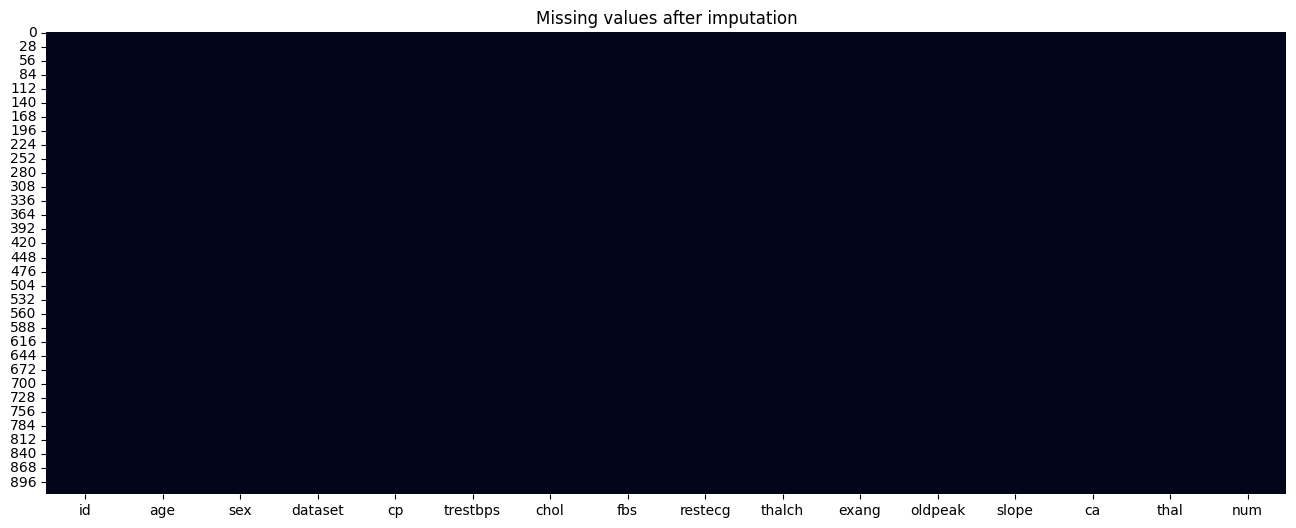

In [17]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

In [18]:
numeric_col = ['age' , 'trestbps' , 'chol' , 'thalch', 'oldpeak']

# calculating the correlation
df[numeric_col].corr()

,age,trestbps,chol,thalch,oldpeak
age,1.000000,0.257025,-0.084028,-0.376424,0.292794
trestbps,0.257025,1.000000,0.089781,-0.116964,0.184514
chol,-0.084028,0.089781,1.000000,0.221283,0.043191
thalch,-0.376424,-0.116964,0.221283,1.000000,-0.179314
oldpeak,0.292794,0.184514,0.043191,-0.179314,1.000000


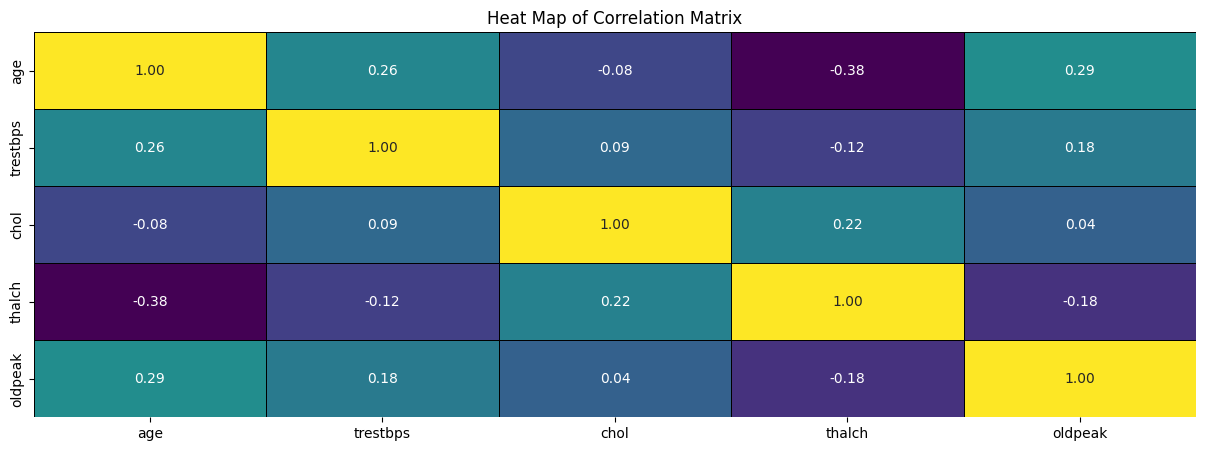

In [19]:
# plotting heatmap of correlation matrix

# setting up the figure size
plt.figure(figsize=(15, 5))
# plotting the heatmap
sns.heatmap(df[numeric_col].corr(), cbar=False , cmap='viridis' , annot=True , fmt='.2f' , linewidths=0.5, linecolor='black')
# defining title
plt.title('Heat Map of Correlation Matrix')
plt.show()

In [20]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#00FFFF"]):
    # Set to "dark" for a black background
    sns.set(style="dark", palette="deep")

    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color=cyan_palette[0])
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#000133')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=2.5,
                    flierprops=dict(markerfacecolor='w', marker='o', markeredgecolor='w', markersize=5),
                    whiskerprops=dict(color='white', linewidth=2.5),
                    capprops=dict(color='white', linewidth=2.5),
                    boxprops=dict(edgecolor='white', linewidth=2.5))
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#000133')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

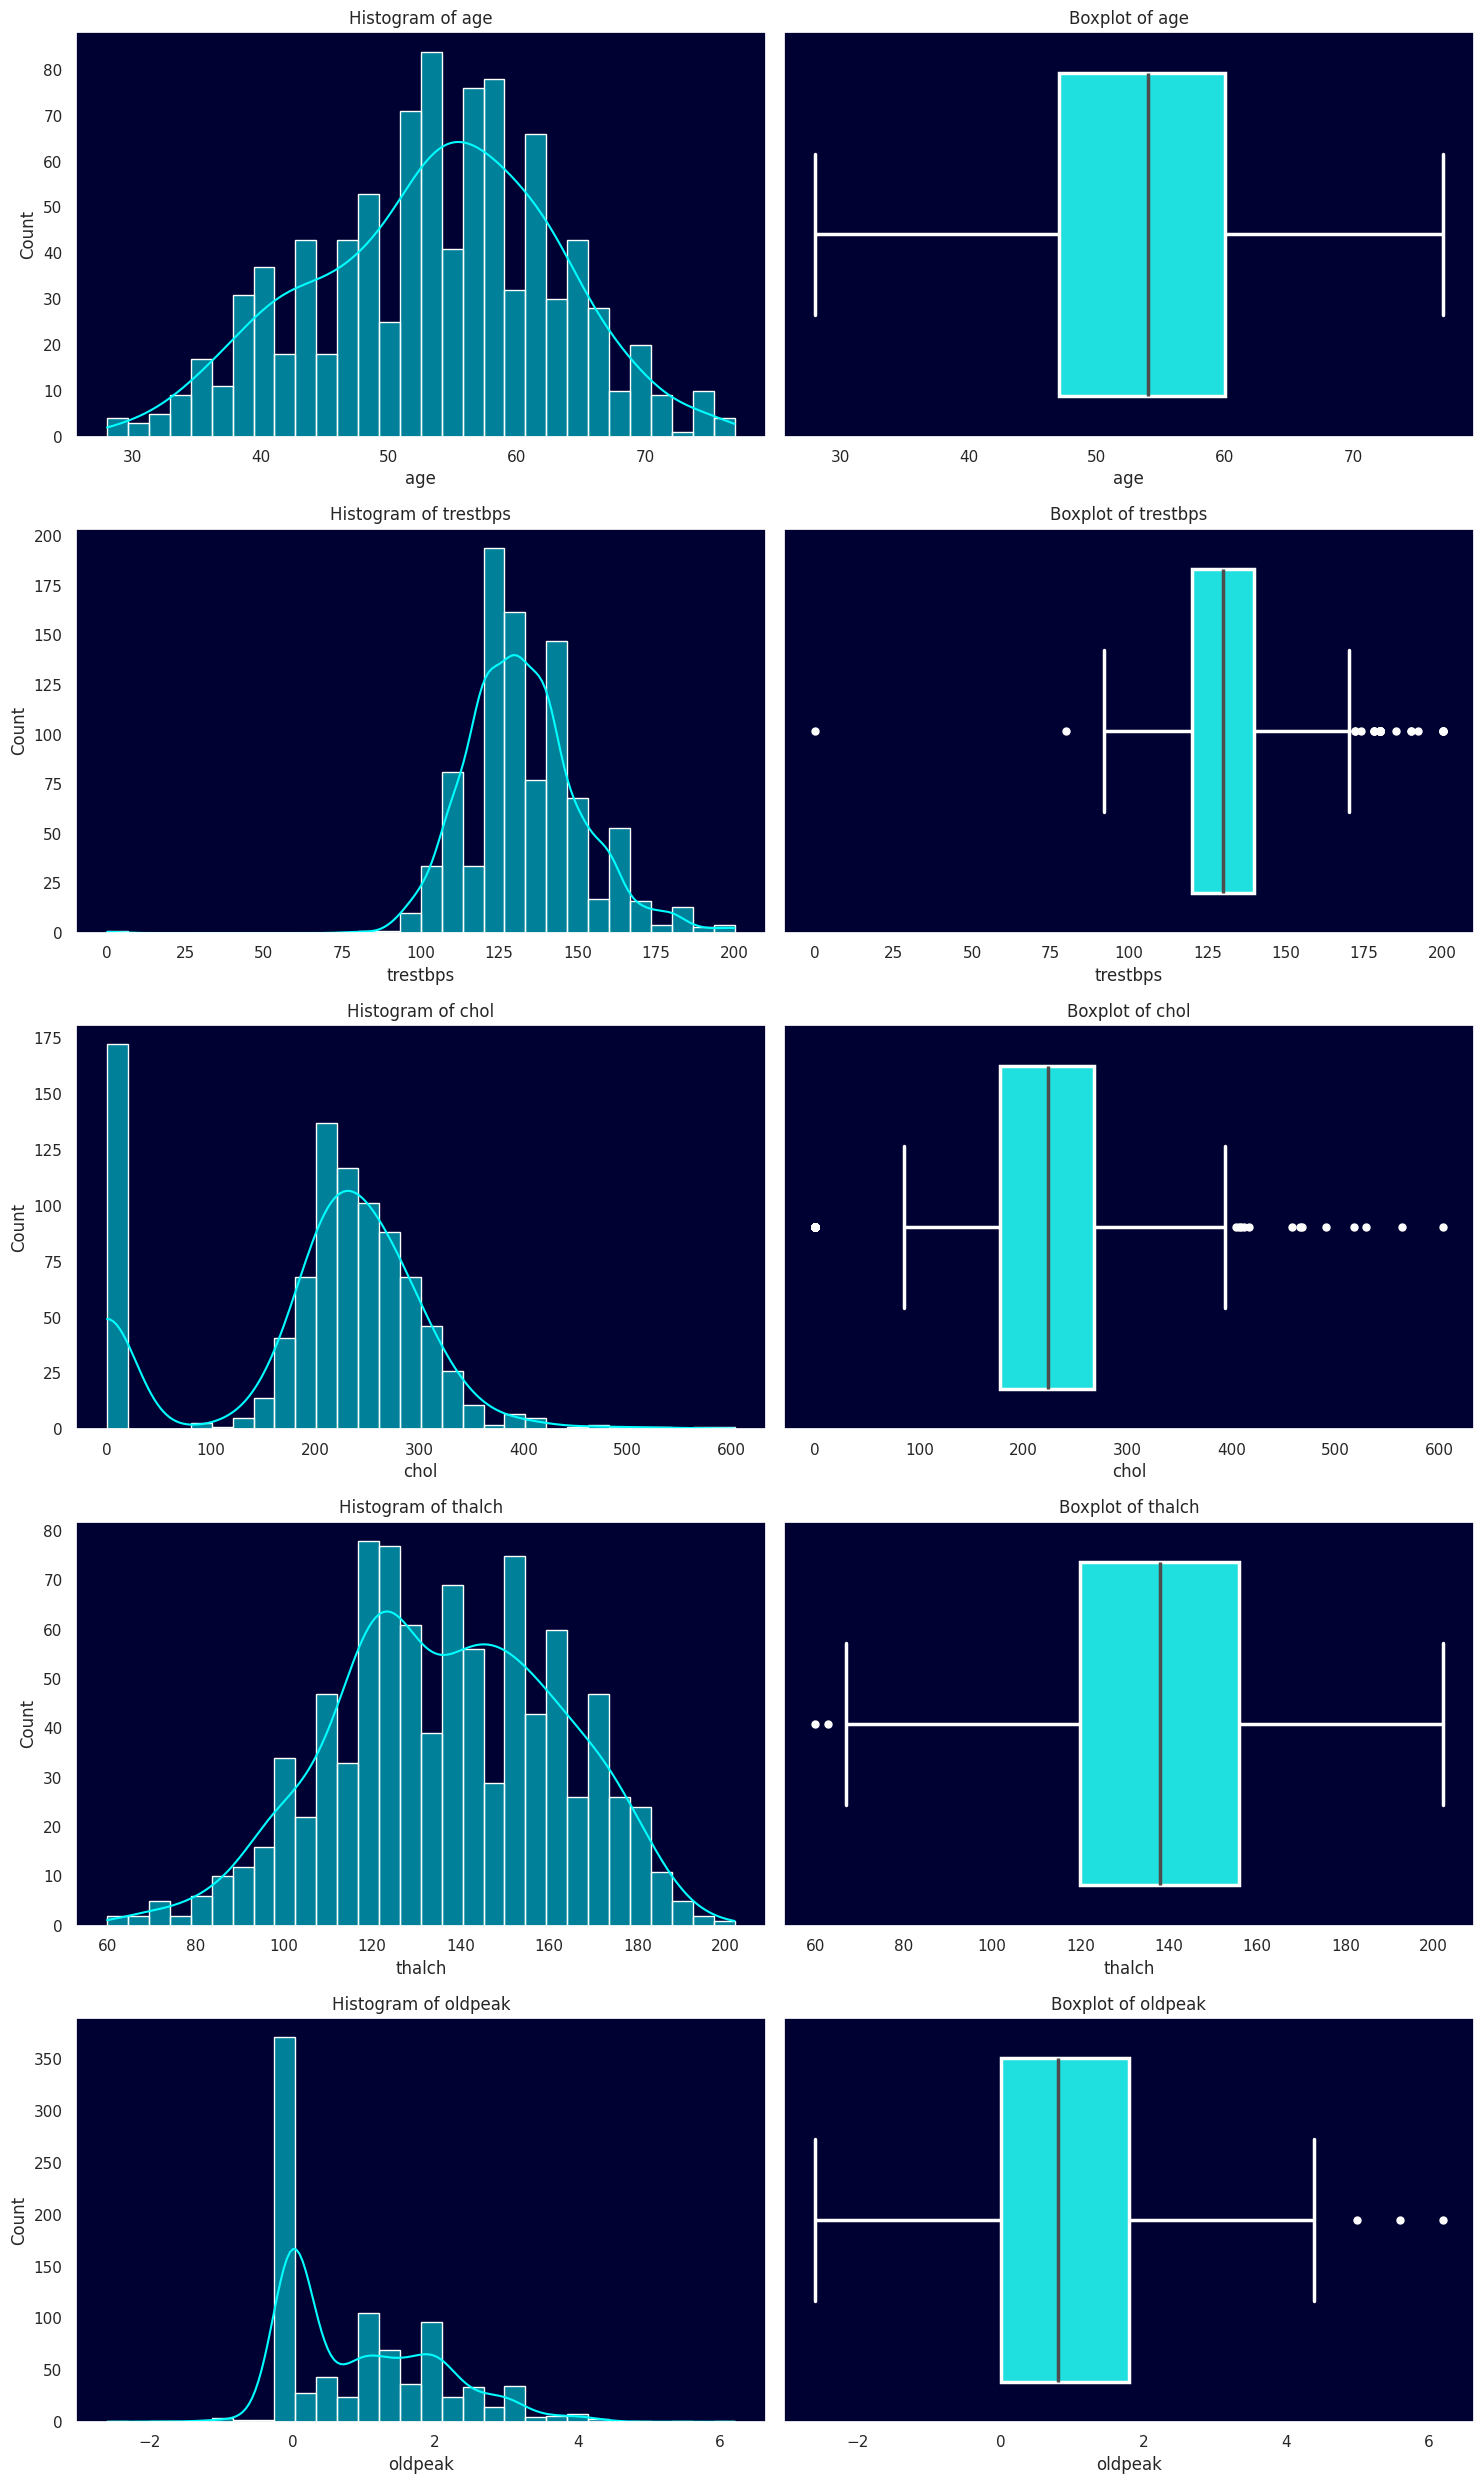

In [11]:
# Plot histogram and boxplot for numerical columns before scaling
plot_histogram_and_boxplot(df, numeric_col)

In [21]:
# Calculate quantile ranges for each numerical column
def calc_lower_upper_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bound for outliers which is 1.5 times the IQR less than the first and third quartile
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

# Detect outliers based on the IQR
def detect_outliers(df, column):

    lower_bound, upper_bound = calc_lower_upper_bounds(df, column)
    # Detect outliers based on the lower and upper bounds
    outliers_detected = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    #calculate the percentage of outliers in the dataset
    outliers_percentage = round(len(outliers_detected) / df[column].shape[0] * 100, 2)
    print(f"Number of outliers detected in {column}: {outliers_percentage}%")

# Remove outliers based on the IQR
def remove_outliers(df, column):

    lower_bound, upper_bound = calc_lower_upper_bounds(df, column)
    # Remove outliers from the dataframe
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Disaplay heading
print_heading(f"percentages of outliers detected".upper())

# Detect and remove outliers for the numerical column
for col in numeric_cols:
    detect_outliers(df, col)
    # Only remove outliers for 'chol'
    if col in ['chol']:
        df = remove_outliers(df, col)

--------------------------------------------------
PERCENTAGES OF OUTLIERS DETECTED
--------------------------------------------------
Number of outliers detected in oldpeak: 0.33%
Number of outliers detected in thalch: 0.22%
Number of outliers detected in chol: 20.11%
Number of outliers detected in trestbps: 2.72%
Number of outliers detected in age: 0.0%


In [22]:
# performing label encoding

# calling the encoder
encoder = LabelEncoder()

# creating an empty dictionary to store the encoder
le = {}

# define a function of label encoding
def label_encoding(df, col):

    # for loop which runs over each column
    for col in df.columns:
        # checking if the column is of object or category type
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            # perform label encoding on the column which are either object or category
            df[col] = encoder.fit_transform(df[col])
            # store the encoder in the dictionary
            le[col] = encoder

    return df

In [23]:
# calling the function
label_encoding(df, df.columns)

# confirming the outcome
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [24]:
# selecting the column which needs to be scaled
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age' , 'trestbps' , 'chol' , 'thalch', 'oldpeak']

# scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

# fitting the data to the scaler
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

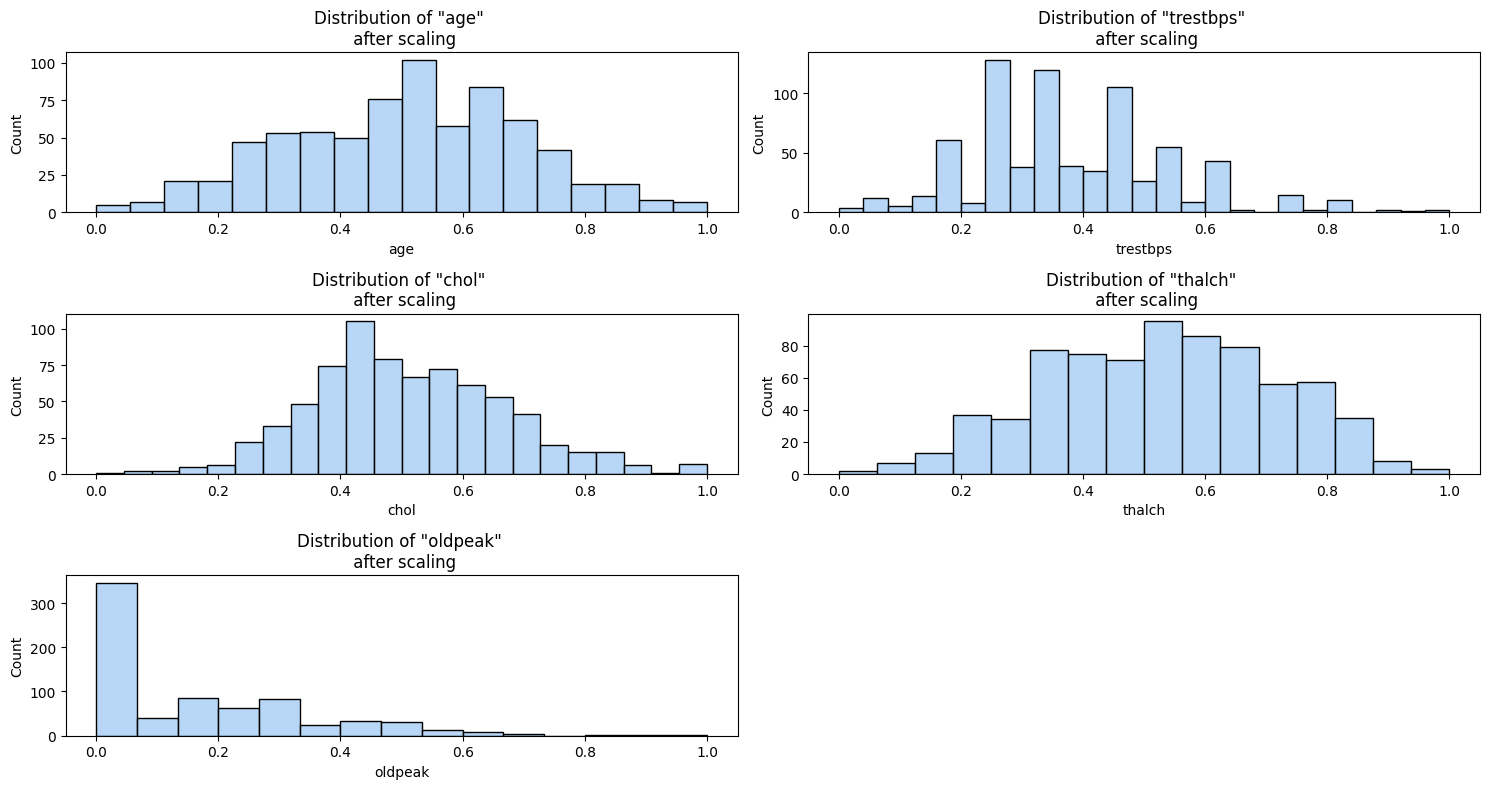

In [25]:
# plotting the distribution of the scaled data

# list of specific columns
cols_to_scale = ['age' , 'trestbps' , 'chol' , 'thalch' , 'oldpeak']
# setting up the figure size
plt.figure(figsize=(15, 8))
# loop through each column
for i, col in enumerate(cols_to_scale):
    # create a subplot
    plt.subplot(3, 2,  i+1)
    # plotting the distribution
    sns.histplot(df[col], fill=True, color='#a1c9f4')
    # adding title
    plt.title(f'Distribution of "{col}" \n after scaling')

plt.tight_layout()
plt.show()

In [26]:
y=df['num']
X=df.drop(['num'],axis=1)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [34]:
# Définir la grille des hyperparamètres pour RandomizedSearchCV
parameters = {
    'max_depth': [3, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 6]
}


In [35]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz

In [36]:
# Créer un DecisionTreeClassifier et effectuer une recherche aléatoire des hyperparamètres
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=parameters, cv=5, verbose=True)
DT_grid.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6]},
                   verbose=True)

In [37]:
# Récupérer les meilleurs hyperparamètres trouvés
best_params = DT_grid.best_params_
print("Meilleurs hyperparamètres :", best_params)

# Créer un classifieur DecisionTree avec les meilleurs hyperparamètres
dt = DecisionTreeClassifier(**best_params)

# Entraîner le modèle sur l'ensemble d'entraînement
dt.fit(x_train, y_train)


Meilleurs hyperparamètres : {'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini'}


DecisionTreeClassifier(max_depth=4, max_features='log2')

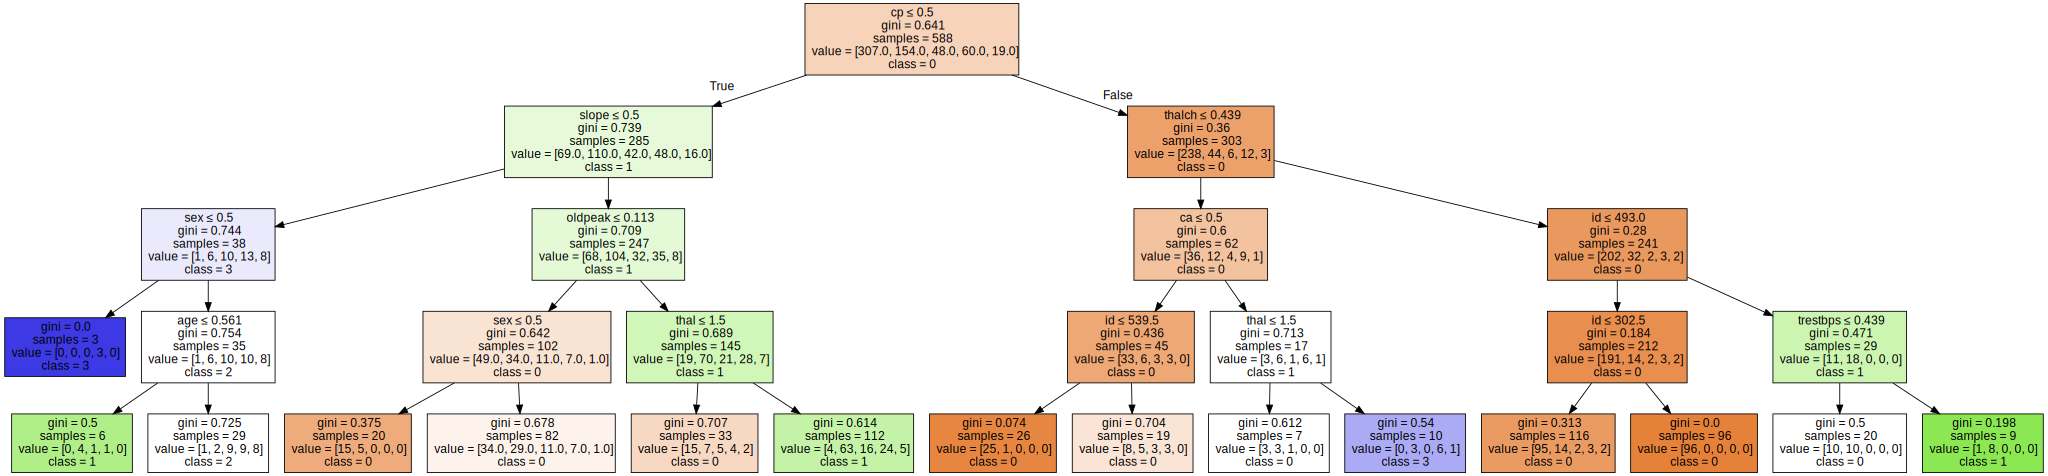

In [38]:
# Visualiser l'arbre de décision
dtree_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['0', '1', '2', '3', '4'],  # Modifier en fonction de vos classes réelles
    filled=True,
    special_characters=True
)

# Créer un graphique à partir des données de l'arbre de décision
graph = graphviz.Source(dtree_data)

# Afficher le graphique
graph


In [39]:
# Importer les bibliothèques nécessaires pour l'évaluation (si pas encore fait)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prédire les valeurs sur l'ensemble de test
y_pred = dt.predict(x_test)


In [40]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les résultats de l'évaluation
print("Précision du modèle :", accuracy)
print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)


Précision du modèle : 0.6938775510204082
Matrice de confusion :
 [[73  5  1  0  0]
 [16 27  0  0  0]
 [ 5  6  2  1  0]
 [ 4  4  1  0  0]
 [ 1  1  0  0  0]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.74      0.92      0.82        79
           1       0.63      0.63      0.63        43
           2       0.50      0.14      0.22        14
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2

    accuracy                           0.69       147
   macro avg       0.37      0.34      0.33       147
weighted avg       0.63      0.69      0.65       147



In [41]:
from sklearn.tree import _tree

def find_most_relevant_node(dt, feature_names):
    # Récupérer l'arbre de décision
    tree = dt.tree_

    # Parcourir les nœuds de l'arbre
    node_depth = np.zeros(shape=tree.node_count, dtype=np.int64)
    is_leaves = np.zeros(shape=tree.node_count, dtype=bool)
    stack = [(0, -1)]  # Stack pour parcourir les nœuds, commence à partir de la racine

    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # Vérifier si le nœud est une feuille
        if (tree.children_left[node_id] != _tree.TREE_LEAF):
            stack.append((tree.children_left[node_id], parent_depth + 1))
            stack.append((tree.children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    # Sélectionner le nœud avec la caractéristique la plus importante au niveau le plus haut (proche de la racine)
    most_relevant_node_id = np.argmax(tree.feature)
    most_relevant_feature = feature_names[tree.feature[most_relevant_node_id]]
    most_relevant_threshold = tree.threshold[most_relevant_node_id]

    print(f"Nœud le plus pertinent : {most_relevant_node_id}")
    print(f"Caractéristique la plus pertinente : {most_relevant_feature}")
    print(f"Seuil : {most_relevant_threshold}")

    return most_relevant_node_id, most_relevant_feature, most_relevant_threshold

# Exécuter la fonction pour trouver le nœud le plus pertinent
node_id, feature, threshold = find_most_relevant_node(dt, X.columns)


Nœud le plus pertinent : 11
Caractéristique la plus pertinente : thal
Seuil : 1.5


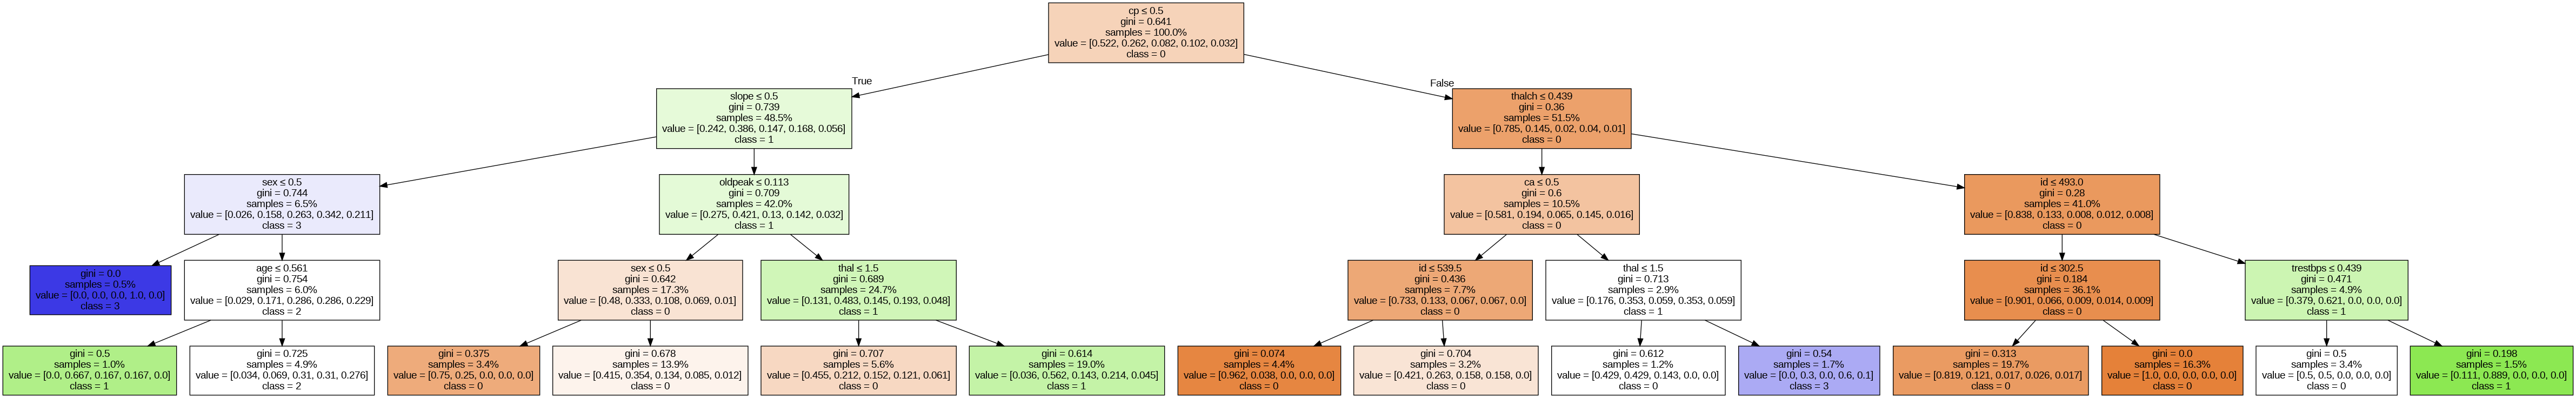

In [42]:
# Visualiser l'arbre de décision avec des options de mise à l'échelle
dtree_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['0', '1', '2', '3', '4'],  # Modifier en fonction de vos classes réelles
    filled=True,
    special_characters=True,
    proportion=True  # Ajuster la taille des nœuds proportionnellement
)

# Créer un graphique à partir des données de l'arbre de décision
graph = graphviz.Source(dtree_data)

# Redimensionner et afficher le graphique
graph.render("tree_visualization", format="png", cleanup=True)
from IPython.display import Image
Image(filename="tree_visualization.png")


en bas c'est une autre methode implementer directement sans prendre en compte le travaille qu'on a fait pour preparer les donnees



In [ ]:
df_dummies=pd.get_dummies(data=df,dtype='int')

In [ ]:
y=df['num']
X=df_dummies.drop(['num'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'max_depth': [3, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 6]
}

In [ ]:
DT_grid=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameters,cv=5,verbose=True)

In [ ]:
DT_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6]},
                   verbose=True)

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_split=4)

In [ ]:
dt=DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=4)

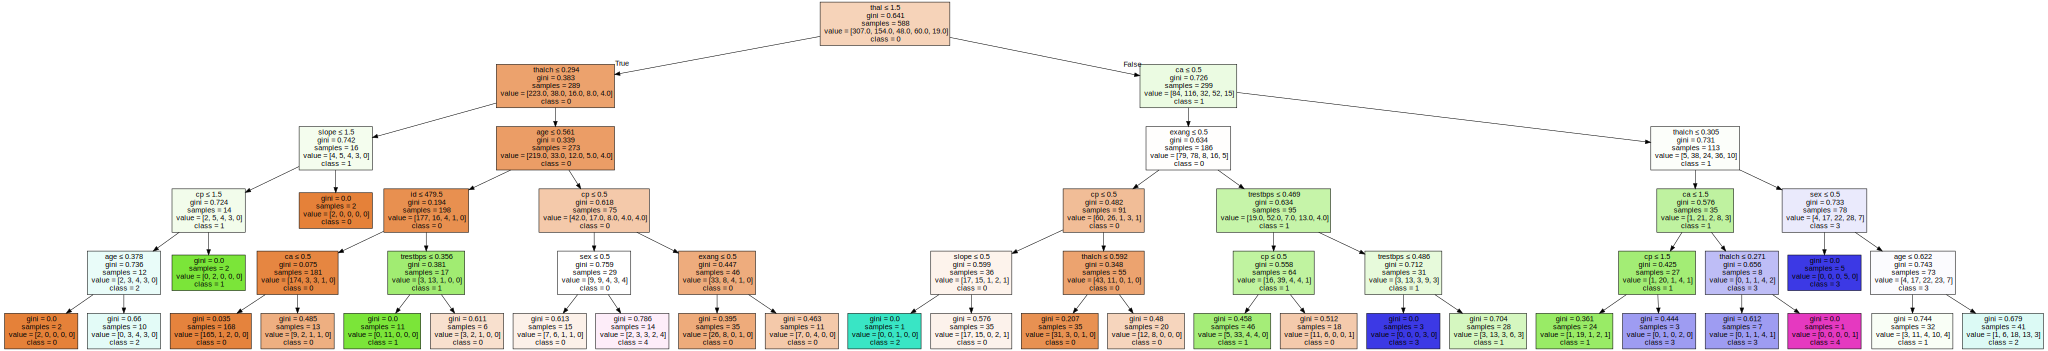

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dtree_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['0', '1','2','3','4'],
    filled=True,
    special_characters=True
)

graph = graphviz.Source(dtree_data)

graph

In [ ]:
# Afficher les meilleurs hyperparamètres
best_estimator = DT_grid.best_estimator_
print("Meilleurs hyperparamètres :", best_estimator)

# Entraîner le modèle avec les meilleurs hyperparamètres
dt = best_estimator
dt.fit(x_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = dt.predict(x_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Précision du modèle :", accuracy)
print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)

Meilleurs hyperparamètres : DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_split=4)
Précision du modèle : 0.6666666666666666
Matrice de confusion :
 [[64 11  1  0  3]
 [10 27  4  1  1]
 [ 3  4  6  1  0]
 [ 2  4  2  1  0]
 [ 0  1  0  1  0]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        79
           1       0.57      0.63      0.60        43
           2       0.46      0.43      0.44        14
           3       0.25      0.11      0.15         9
           4       0.00      0.00      0.00         2

    accuracy                           0.67       147
   macro avg       0.42      0.40      0.40       147
weighted avg       0.66      0.67      0.66       147

